In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
ethnicityds=pd.read_csv('ethnicity.csv')

ethnicityds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47708 entries, 0 to 47707
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   time_period                        47708 non-null  int64  
 1   time_identifier                    47708 non-null  object 
 2   geographic_level                   47708 non-null  object 
 3   country_code                       47708 non-null  object 
 4   country_name                       47708 non-null  object 
 5   region_code                        47396 non-null  object 
 6   region_name                        47396 non-null  object 
 7   old_la_code                        43965 non-null  float64
 8   new_la_code                        43777 non-null  object 
 9   la_name                            43965 non-null  object 
 10  ethnicity_major                    47708 non-null  object 
 11  ethnicity_minor                    47708 non-null  obj

In [3]:
ethnicityds.head(5)

time_period time_identifier geographic_level country_code country_name  \
0       200910   Academic year         National    E92000001      England   
1       200910   Academic year         National    E92000001      England   
2       200910   Academic year         National    E92000001      England   
3       200910   Academic year         National    E92000001      England   
4       200910   Academic year         National    E92000001      England   

  region_code region_name  old_la_code new_la_code la_name ethnicity_major  \
0         NaN         NaN          NaN         NaN     NaN           White   
1         NaN         NaN          NaN         NaN     NaN           White   
2         NaN         NaN          NaN         NaN     NaN           White   
3         NaN         NaN          NaN         NaN     NaN           White   
4         NaN         NaN          NaN         NaN     NaN           White   

               ethnicity_minor  progression_rate  \
0              White - British              31.3   
1                White - Irish              40.1   
2  Traveller of Irish Heritage               8.7   
3                 Gypsy / Roma               3.4   
4   Any Other White Background              41.7   

   high_tariff_progression_rate  number_of_he_students  \
0                           8.3                 151946   
1                          13.3                    874   
2                           0.8                     11   
3                           0.3                     11   
4                          11.4                   5074   

   number_of_high_tariff_he_students  number_of_students  
0                              40059              485435  
1                                290                2180  
2                                  1                 126  
3                                  1                 324  
4                               1386               12155

In [4]:
ethnicityds.shape

(47708, 17)

In [5]:
ethnicityds.isna().sum()

time_period                             0
time_identifier                         0
geographic_level                        0
country_code                            0
country_name                            0
region_code                           312
region_name                           312
old_la_code                          3743
new_la_code                          3931
la_name                              3743
ethnicity_major                         0
ethnicity_minor                         0
progression_rate                        0
high_tariff_progression_rate            0
number_of_he_students                   0
number_of_high_tariff_he_students       0
number_of_students                      0
dtype: int64

In [6]:
ethnicityds.dropna(inplace=True)

In [7]:
ethnicityds.isna().sum()

time_period                          0
time_identifier                      0
geographic_level                     0
country_code                         0
country_name                         0
region_code                          0
region_name                          0
old_la_code                          0
new_la_code                          0
la_name                              0
ethnicity_major                      0
ethnicity_minor                      0
progression_rate                     0
high_tariff_progression_rate         0
number_of_he_students                0
number_of_high_tariff_he_students    0
number_of_students                   0
dtype: int64

In [8]:
ethnicityds['year'] = (ethnicityds['time_period'] % 100) + 2000


In [9]:
ethnicityds.drop('time_period', axis=1, inplace=True)

In [10]:
ethnicityds.head()

time_identifier geographic_level country_code country_name region_code  \
288   Academic year  Local authority    E92000001      England   E12000001   
289   Academic year  Local authority    E92000001      England   E12000001   
290   Academic year  Local authority    E92000001      England   E12000001   
291   Academic year  Local authority    E92000001      England   E12000001   
292   Academic year  Local authority    E92000001      England   E12000001   

    region_name  old_la_code new_la_code    la_name ethnicity_major  \
288  North East        390.0   E08000037  Gateshead           White   
289  North East        390.0   E08000037  Gateshead           White   
290  North East        390.0   E08000037  Gateshead           White   
291  North East        390.0   E08000037  Gateshead           White   
292  North East        390.0   E08000037  Gateshead           White   

                ethnicity_minor  progression_rate  \
288             White - British              35.7   
289               White - Irish               0.0   
290                Gypsy / Roma               0.0   
291  Any Other White Background              42.9   
292                       Total              35.7   

     high_tariff_progression_rate  number_of_he_students  \
288                           7.5                    565   
289                           0.0                      0   
290                           0.0                      0   
291                           0.0                      3   
292                           7.5                    568   

     number_of_high_tariff_he_students  number_of_students  year  
288                                119                1582  2010  
289                                  0                   3  2010  
290                                  0                   1  2010  
291                                  0                   7  2010  
292                                119                1593  2010

In [11]:
ethnicityds = ethnicityds[ethnicityds['ethnicity_major'].isin(['White', 'Mixed', 'Asian', 'Black', 'Chinese', 'Any Other Ethnic Group'])]

ethnicityds.shape

(39901, 17)

# Identification of Outliers

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_39063/1922364278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ethnicityds, x='ethnicity_major', y='progression_rate',palette='hls')


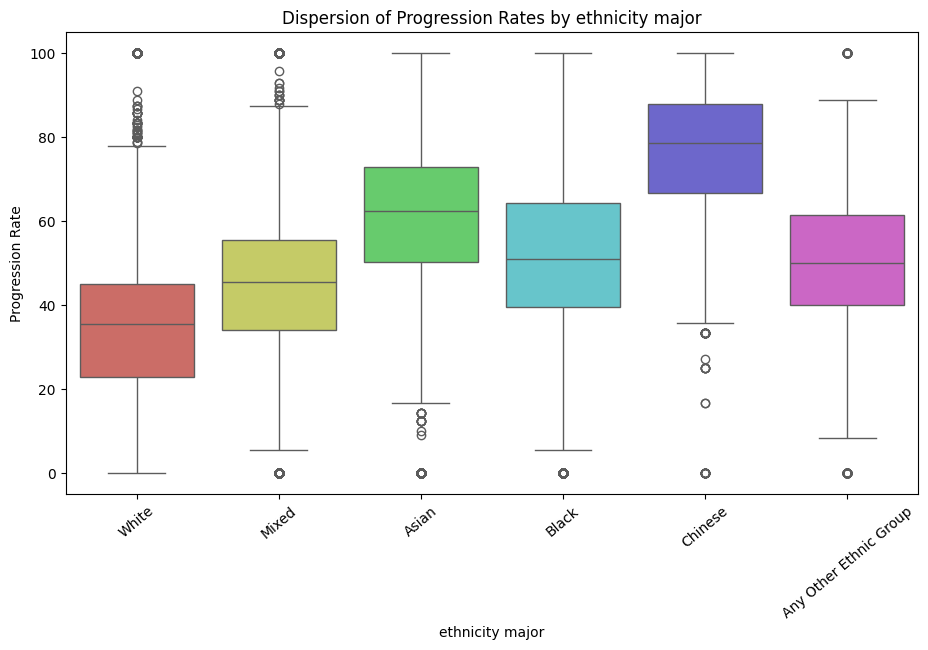

In [12]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=ethnicityds, x='ethnicity_major', y='progression_rate',palette='hls')
plt.xticks(rotation=40)
plt.title('Dispersion of Progression Rates by ethnicity major')
plt.xlabel('ethnicity major')
plt.ylabel('Progression Rate')
plt.show()

# Remove Outliers

In [13]:
def rmve_outliers_mth(passdf):
    filtdata = pd.DataFrame()
    for categdt, grpdt in passdf.groupby('ethnicity_major'):
        firstQ1 = grpdt['progression_rate'].quantile(0.25)
        thirdQ3 = grpdt['progression_rate'].quantile(0.75)
        dtIQR = thirdQ3 - firstQ1
        lwrbnd = firstQ1 - 1.5 * dtIQR
        upbnd = thirdQ3 + 1.5 * dtIQR
        filtgrp = grpdt[(grpdt['progression_rate'] >= lwrbnd) & (grpdt['progression_rate'] <= upbnd)]
        filtdata = pd.concat([filtdata, filtgrp])
    return filtdata


In [14]:
filtethnicity_dt=ethnicityds
ethni_dts_outliers1 = rmve_outliers_mth(filtethnicity_dt)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_39063/1853219410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ethni_dts_outliers1, x='ethnicity_major', y='progression_rate',palette='hls')


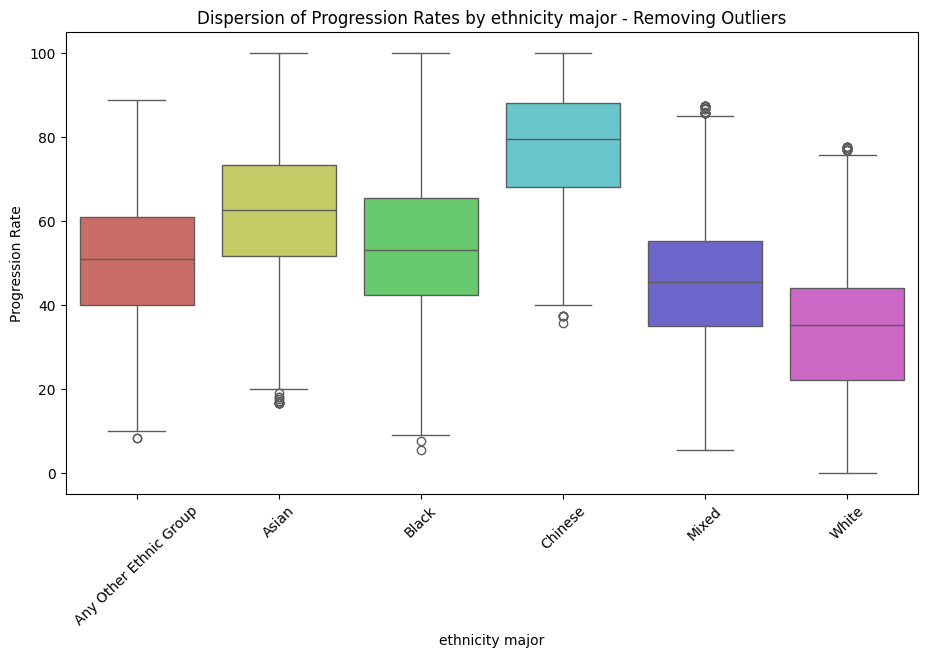

In [15]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=ethni_dts_outliers1, x='ethnicity_major', y='progression_rate',palette='hls')
plt.xticks(rotation=44)
plt.title('Dispersion of Progression Rates by ethnicity major - Removing Outliers')
plt.xlabel('ethnicity major')
plt.ylabel('Progression Rate')
plt.show()

In [16]:
ethni_dts_outliers2 = rmve_outliers_mth(ethni_dts_outliers1)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_39063/329677102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ethni_dts_outliers2, x='ethnicity_major', y='progression_rate',palette='hls')


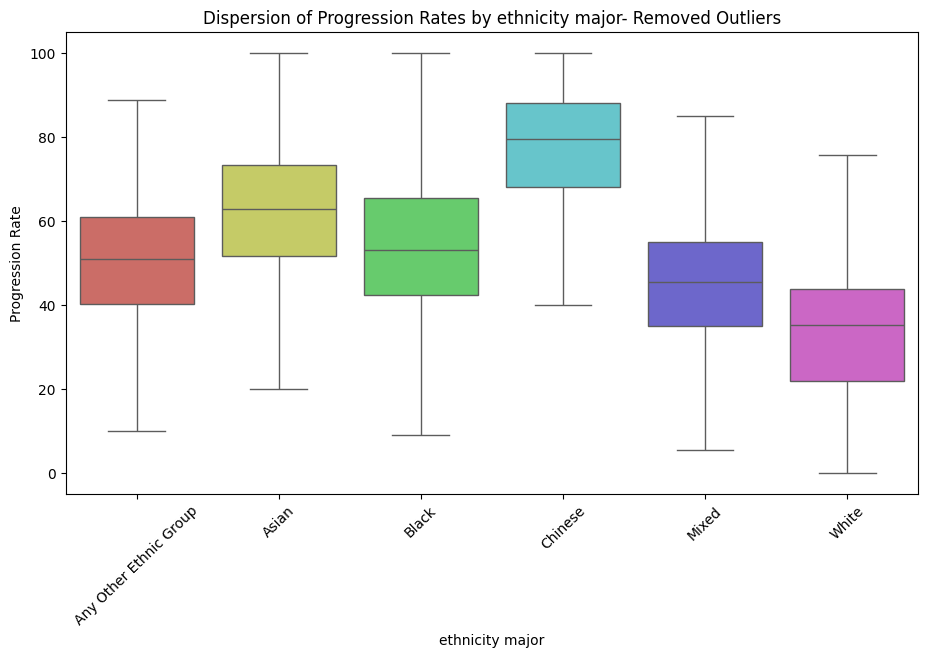

In [17]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=ethni_dts_outliers2, x='ethnicity_major', y='progression_rate',palette='hls')
plt.xticks(rotation=44)
plt.title('Dispersion of Progression Rates by ethnicity major- Removed Outliers')
plt.xlabel('ethnicity major')
plt.ylabel('Progression Rate')
plt.show()

In [18]:
import plotly.express as px
bar_ethnicity_ds = ethni_dts_outliers2.groupby('ethnicity_major')['progression_rate'].median().reset_index()
fig = px.bar(bar_ethnicity_ds, x='ethnicity_major', y='progression_rate', text='progression_rate', 
             color='ethnicity_major', color_discrete_sequence=px.colors.qualitative.Set1,
             labels={'progression_rate': 'Average progression_rate'}, height=350)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside') 
fig.update_layout(height=550, width=900)
fig.show()


# Identifying outliers in ethnicity minor

In [19]:
ethni_dts_outliers2 = ethni_dts_outliers2[~ethni_dts_outliers2['ethnicity_minor'].isin(['Unknown','Total'])]


In [20]:
def rmve_outliers_mth(passdf):
    filtdata = pd.DataFrame()
    for categdt, grpdt in passdf.groupby('ethnicity_minor'):
        firstQ1 = grpdt['progression_rate'].quantile(0.25)
        thirdQ3 = grpdt['progression_rate'].quantile(0.75)
        dtIQR = thirdQ3 - firstQ1
        lwrbnd = firstQ1 - 1.5 * dtIQR
        upbnd = thirdQ3 + 1.5 * dtIQR
        filtgrp = grpdt[(grpdt['progression_rate'] >= lwrbnd) & (grpdt['progression_rate'] <= upbnd)]
        filtdata = pd.concat([filtdata, filtgrp])
    return filtdata


/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_39063/1067720408.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




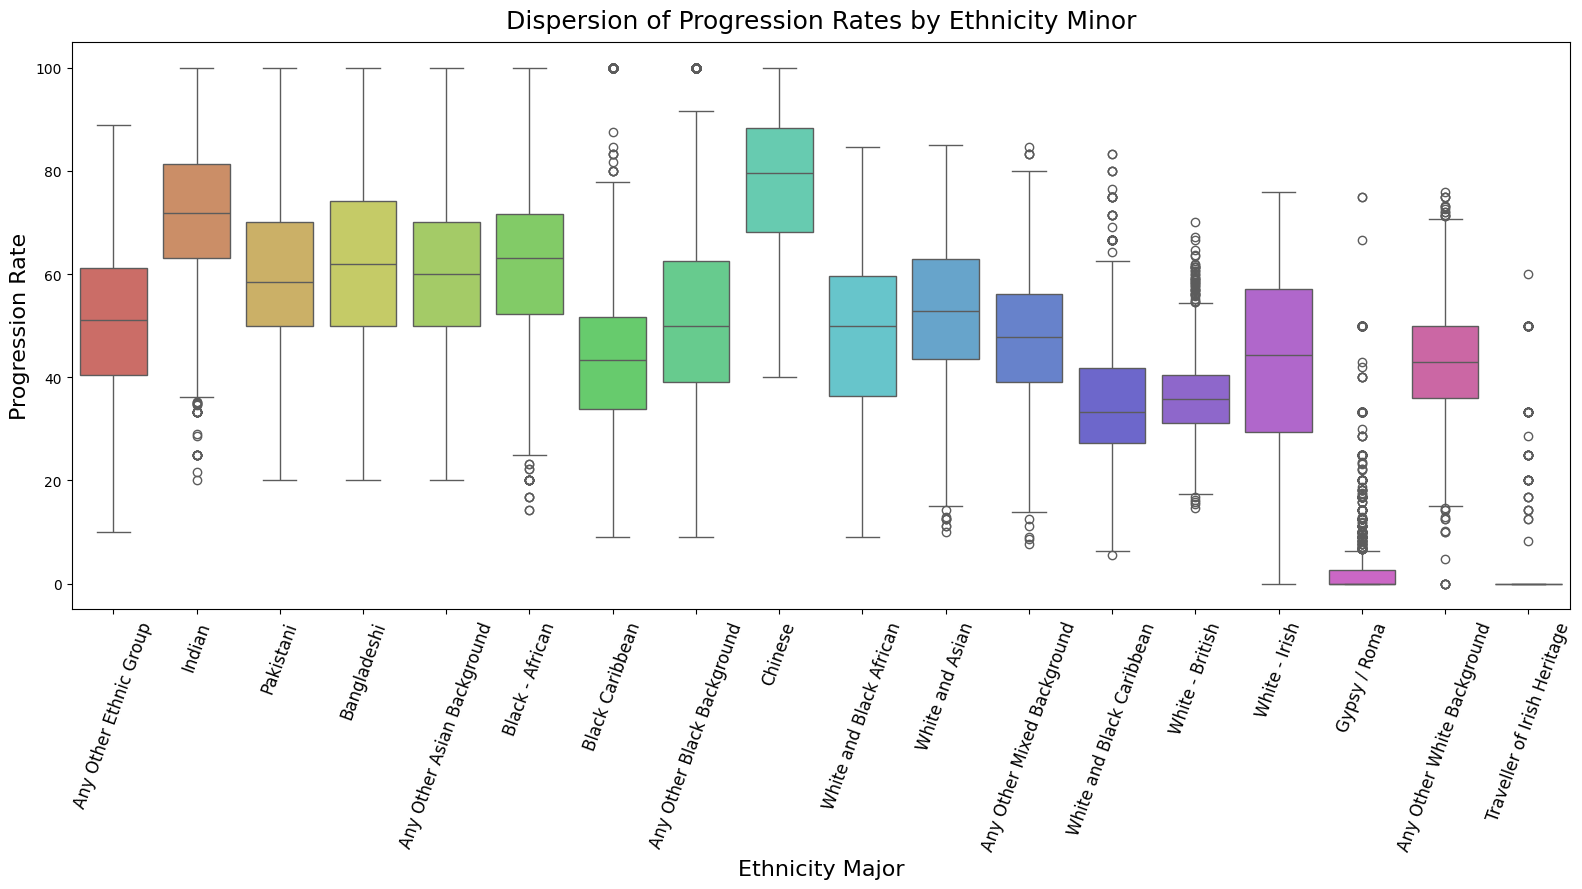

In [21]:
plt.figure(figsize=(16, 9))  
sns.boxplot(data=ethni_dts_outliers2, x='ethnicity_minor', y='progression_rate', palette='hls')
plt.xticks(rotation=70, fontsize=12)  
plt.title('Dispersion of Progression Rates by Ethnicity Minor', fontsize=18, pad= 10)  
plt.xlabel('Ethnicity Major', fontsize=16)  
plt.ylabel('Progression Rate', fontsize=16)  
plt.tight_layout()  
plt.show()


In [22]:
ethni_dts_outliers_min1 = rmve_outliers_mth(ethni_dts_outliers2)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_39063/1102841911.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




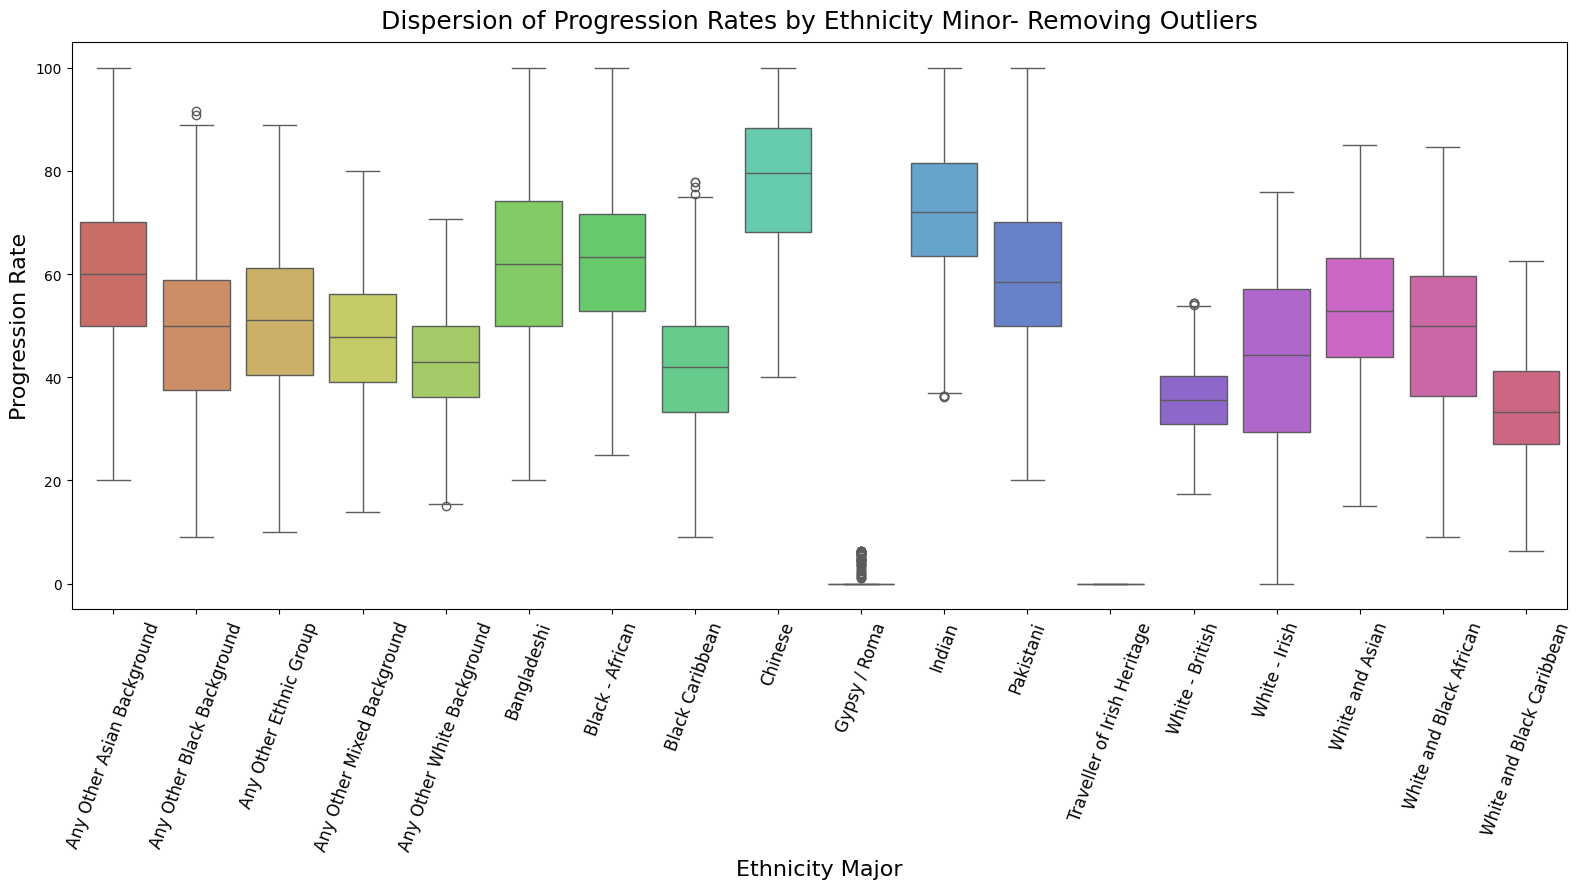

In [23]:
plt.figure(figsize=(16, 9))  
sns.boxplot(data=ethni_dts_outliers_min1, x='ethnicity_minor', y='progression_rate', palette='hls')
plt.xticks(rotation=70, fontsize=12)  
plt.title('Dispersion of Progression Rates by Ethnicity Minor- Removing Outliers', fontsize=18, pad= 10)  
plt.xlabel('Ethnicity Major', fontsize=16)  
plt.ylabel('Progression Rate', fontsize=16)  
plt.tight_layout()  
plt.show()


In [24]:
ethni_dts_outliers_min2 = rmve_outliers_mth(ethni_dts_outliers_min1)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_39063/3231508780.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




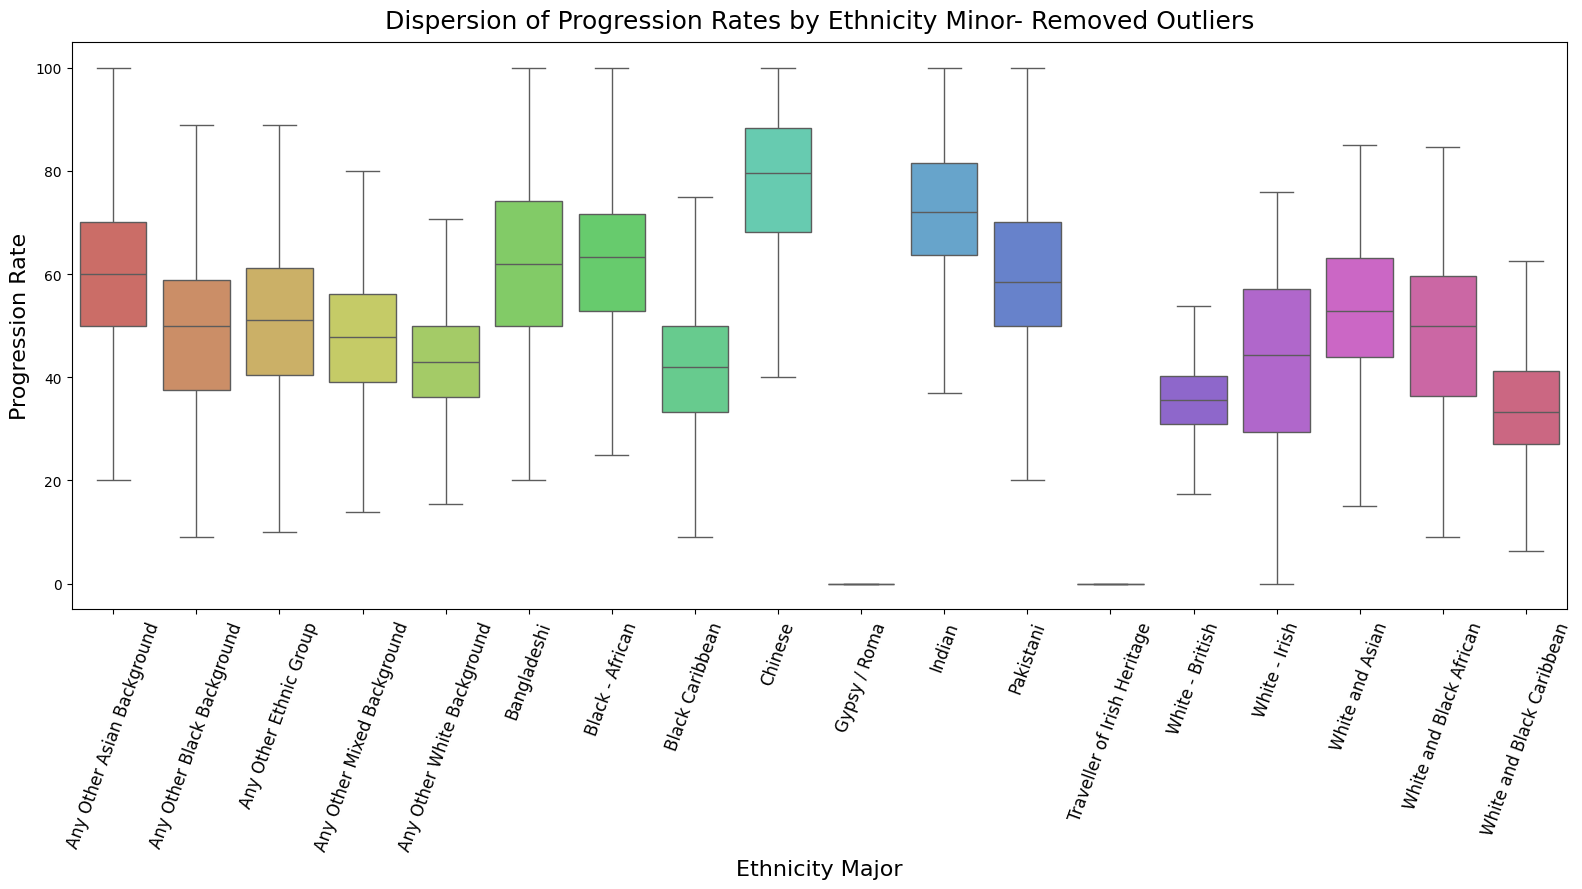

In [25]:
plt.figure(figsize=(16, 9))  
sns.boxplot(data=ethni_dts_outliers_min2, x='ethnicity_minor', y='progression_rate', palette='hls')
plt.xticks(rotation=70, fontsize=12)  
plt.title('Dispersion of Progression Rates by Ethnicity Minor- Removed Outliers', fontsize=18, pad= 10)  
plt.xlabel('Ethnicity Major', fontsize=16)  
plt.ylabel('Progression Rate', fontsize=16)  
plt.tight_layout()  
plt.show()


In [26]:


bar_ethnicityds = ethni_dts_outliers_min2.groupby('ethnicity_minor')['progression_rate'].median().reset_index()
fig = px.bar(bar_ethnicityds, x='ethnicity_minor', y='progression_rate', text='progression_rate', 
             color='ethnicity_minor', color_discrete_sequence=px.colors.qualitative.Set1,
             labels={'progression_rate': 'Average progression_rate'}, height=400)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside') 
fig.update_layout(height=600, width=1050)
fig.show()


# Comparison of Progression Rates and High Tariff Progression Rates by Year

In [27]:
import plotly.express as px


ethni_dts_outliers_min2_ph = ethni_dts_outliers_min2.groupby('year')[['progression_rate', 'high_tariff_progression_rate']].mean().reset_index()


combinedbar_df = ethni_dts_outliers_min2_ph.melt(id_vars=['year'], 
                                            value_vars=['progression_rate', 'high_tariff_progression_rate'], 
                                            var_name='Rate Type', value_name='Rate')

brcolors = {'progression_rate': '#F4D03F', 'high_tariff_progression_rate': '#76D7C4'}

phfig = px.bar(combinedbar_df, x='year', y='Rate', color='Rate Type', text='Rate', 
             labels={'Rate': 'Progression Rate', 'year': 'Year'},
             color_discrete_map=brcolors, height=450)
phfig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

phfig.update_layout(title='Comparison of Progression Rates and High Tariff Progression Rates by Year',
                  xaxis_title='Year', yaxis_title='Progression Rate', showlegend=True,
                  legend_title='Rate Type', height=550, width=1050)

phfig.show()


# Produced Graph in Tableau for regions 

# Identifying the outliers using violin plot

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_39063/1009208249.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




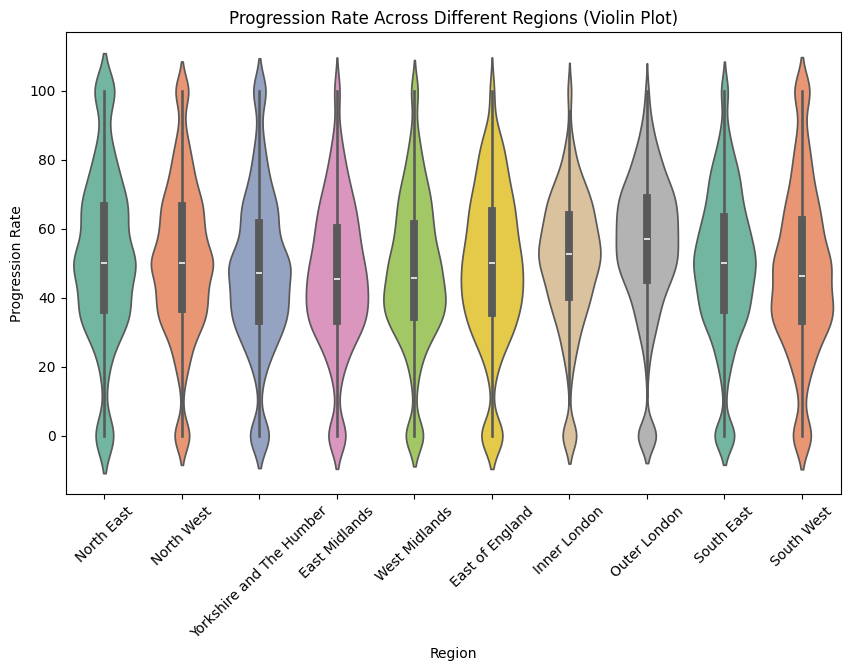

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=ethni_dts_outliers_min2, x='region_name', y='progression_rate', palette='Set2')
plt.title('Progression Rate Across Different Regions (Violin Plot)')
plt.xlabel('Region')
plt.ylabel('Progression Rate')
plt.xticks(rotation=44)
plt.show()


In [29]:
def rmve_outliers_mth(passdf):
    filtdata = pd.DataFrame()
    for categdt, grpdt in passdf.groupby('region_name'):
        firstQ1 = grpdt['progression_rate'].quantile(0.25)
        thirdQ3 = grpdt['progression_rate'].quantile(0.75)
        dtIQR = thirdQ3 - firstQ1
        lwrbnd = firstQ1 - 1.5 * dtIQR
        upbnd = thirdQ3 + 1.5 * dtIQR
        filtgrp = grpdt[(grpdt['progression_rate'] >= lwrbnd) & (grpdt['progression_rate'] <= upbnd)]
        filtdata = pd.concat([filtdata, filtgrp])
    return filtdata


In [30]:
ethni_dts_outliers_reg=rmve_outliers_mth(ethni_dts_outliers_min2)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_39063/4005710058.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




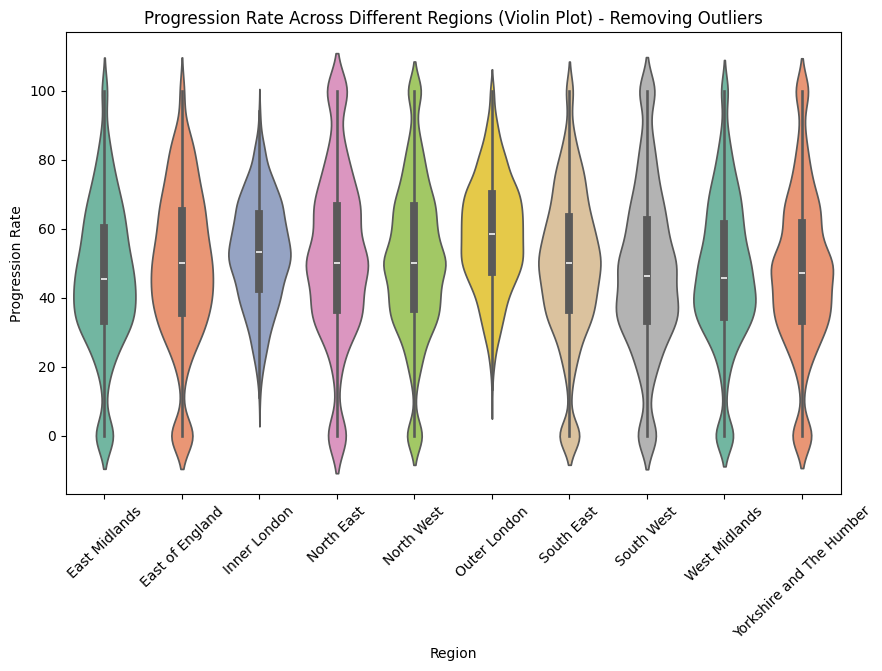

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=ethni_dts_outliers_reg, x='region_name', y='progression_rate', palette='Set2')
plt.title('Progression Rate Across Different Regions (Violin Plot) - Removing Outliers')
plt.xlabel('Region')
plt.ylabel('Progression Rate')
plt.xticks(rotation=44)
plt.show()


In [32]:
ethni_dts_outliers_reg2=rmve_outliers_mth(ethni_dts_outliers_reg)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_39063/1093294782.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




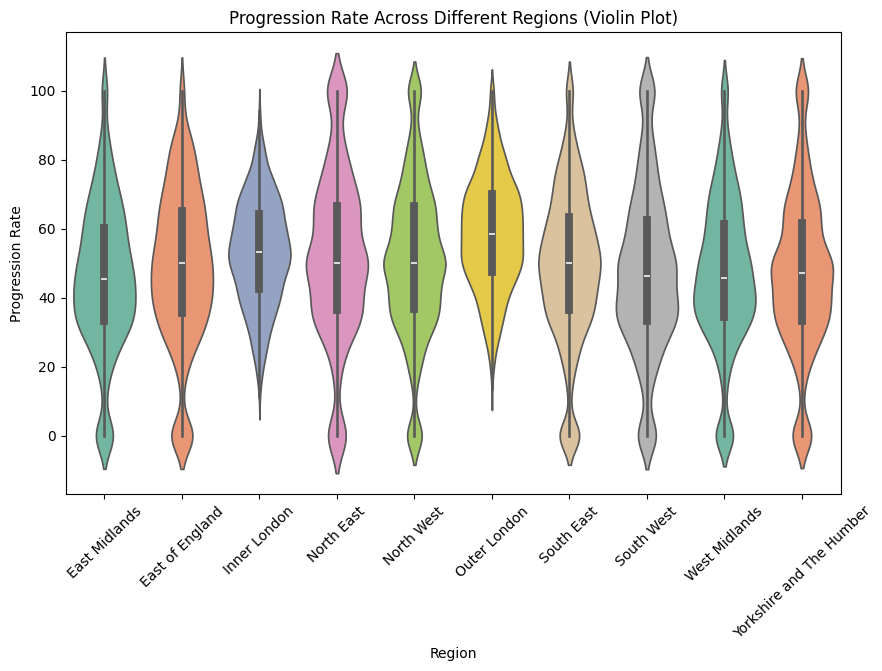

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=ethni_dts_outliers_reg2, x='region_name', y='progression_rate', palette='Set2')
plt.title('Progression Rate Across Different Regions (Violin Plot)')
plt.xlabel('Region')
plt.ylabel('Progression Rate')
plt.xticks(rotation=44)
plt.show()

In [34]:
ethni_dts_outliers_reg3=rmve_outliers_mth(ethni_dts_outliers_reg2)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_39063/4213851071.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




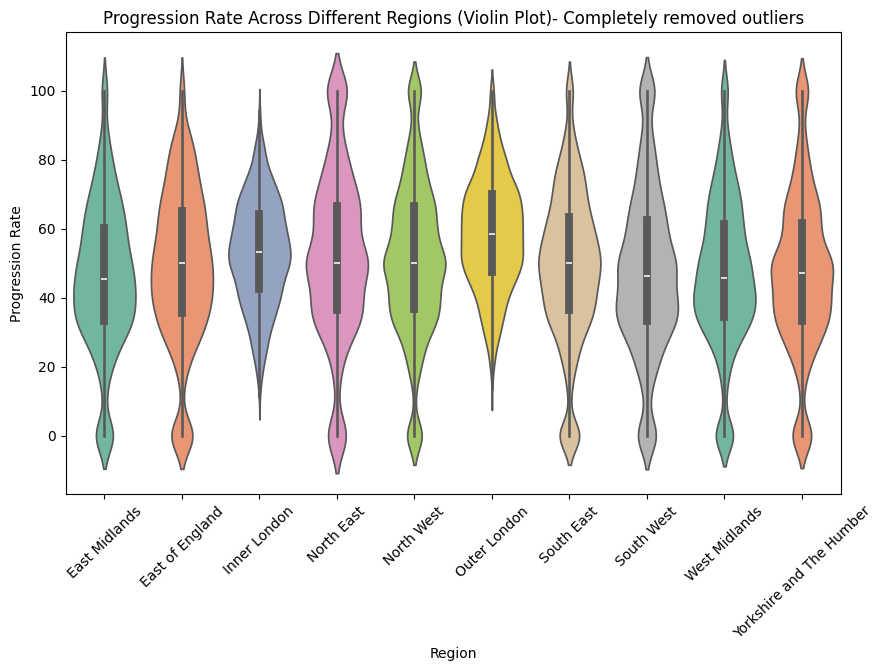

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=ethni_dts_outliers_reg3, x='region_name', y='progression_rate', palette='Set2')
plt.title('Progression Rate Across Different Regions (Violin Plot)- Completely removed outliers')
plt.xlabel('Region')
plt.ylabel('Progression Rate')
plt.xticks(rotation=44)
plt.show()

In [36]:
ethni_dts_outliers_reg4=rmve_outliers_mth(ethni_dts_outliers_reg3)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_39063/4272050236.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




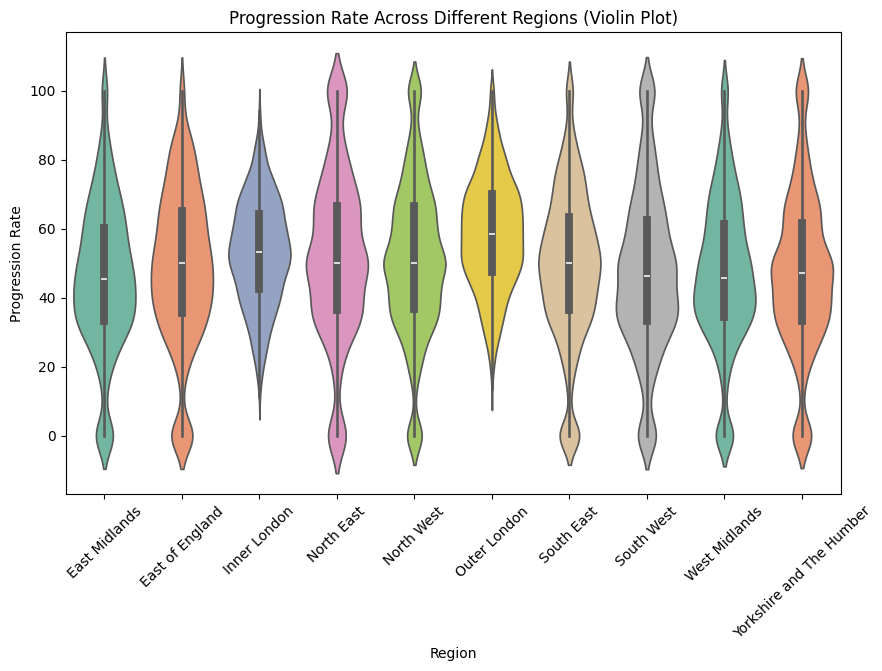

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=ethni_dts_outliers_reg4, x='region_name', y='progression_rate', palette='Set2')
plt.title('Progression Rate Across Different Regions (Violin Plot)')
plt.xlabel('Region')
plt.ylabel('Progression Rate')
plt.xticks(rotation=44)
plt.show()

# Label Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder

for clname in ethni_dts_outliers_reg3.columns:
    if ethni_dts_outliers_reg3[clname].dtype == 'object':
        lblenc_details = LabelEncoder()
        ethni_dts_outliers_reg3[clname] = lblenc_details.fit_transform(ethni_dts_outliers_reg3[clname])




In [39]:
ethni_dts_outliers_reg3

time_identifier  geographic_level  country_code  country_name  \
1352                 0                 0             0             0   
1400                 0                 0             0             0   
1422                 0                 0             0             0   
1457                 0                 0             0             0   
1480                 0                 0             0             0   
...                ...               ...           ...           ...   
45243                0                 0             0             0   
45288                0                 0             0             0   
45331                0                 0             0             0   
45354                0                 0             0             0   
45378                0                 0             0             0   

       region_code  region_name  old_la_code  new_la_code  la_name  \
1352             3            0        830.0          127       32   
1400             3            0        855.0          137       70   
1422             3            0        856.0           15       69   
1457             3            0        891.0          142       91   
1480             3            0        892.0           17       90   
...            ...          ...          ...          ...      ...   
45243            2            9        384.0           90      134   
45288            2            9        811.0           10       38   
45331            2            9        813.0           12       84   
45354            2            9        815.0          141       87   
45378            2            9        816.0           13      150   

       ethnicity_major  ethnicity_minor  progression_rate  \
1352                 1                0              88.9   
1400                 1                0              72.7   
1422                 1                0              55.1   
1457                 1                0              68.4   
1480                 1                0              40.0   
...                ...              ...               ...   
45243                4               17              56.3   
45288                4               17              50.0   
45331                4               17              40.0   
45354                4               17              59.1   
45378                4               17              33.3   

       high_tariff_progression_rate  number_of_he_students  \
1352                           33.3                      8   
1400                            6.1                     24   
1422                           16.9                     98   
1457                           26.3                     13   
1480                           10.0                     12   
...                             ...                    ...   
45243                           6.3                      9   
45288                          30.0                      5   
45331                          20.0                      2   
45354                          22.7                     13   
45378                          22.2                      3   

       number_of_high_tariff_he_students  number_of_students  year  
1352                                   3                   9  2010  
1400                                   2                  33  2010  
1422                                  30                 178  2010  
1457                                   5                  19  2010  
1480                                   3                  30  2010  
...                                  ...                 ...   ...  
45243                                  1                  16  2022  
45288                                  3                  10  2022  
45331                                  1                   5  2022  
45354                                  5                  22  2022  
45378                                  2                   9  20

In [40]:

cond_det = [(ethni_dts_outliers_reg3['progression_rate'] < 25),
    (ethni_dts_outliers_reg3['progression_rate'] >= 25) & (ethni_dts_outliers_reg3['progression_rate'] <= 50),
    (ethni_dts_outliers_reg3['progression_rate'] > 50) & (ethni_dts_outliers_reg3['progression_rate'] <= 75),
    (ethni_dts_outliers_reg3['progression_rate'] > 75) & (ethni_dts_outliers_reg3['progression_rate'] <= 100)
]

newlbl = [0,1,2,3]

ethni_dts_outliers_reg3['progression_rate'] = pd.cut(ethni_dts_outliers_reg3['progression_rate'], bins=[-float("inf"), 25, 50, 75, 100], labels=newlbl)

ethni_dts_outliers_reg3['progression_rate'] = ethni_dts_outliers_reg3['progression_rate'].astype(int)

# Standard Scalar

In [41]:
ethni_dts_outliers_reg3.head()

time_identifier  geographic_level  country_code  country_name  \
1352                0                 0             0             0   
1400                0                 0             0             0   
1422                0                 0             0             0   
1457                0                 0             0             0   
1480                0                 0             0             0   

      region_code  region_name  old_la_code  new_la_code  la_name  \
1352            3            0        830.0          127       32   
1400            3            0        855.0          137       70   
1422            3            0        856.0           15       69   
1457            3            0        891.0          142       91   
1480            3            0        892.0           17       90   

      ethnicity_major  ethnicity_minor  progression_rate  \
1352                1                0                 3   
1400                1                0                 2   
1422                1                0                 2   
1457                1                0                 2   
1480                1                0                 1   

      high_tariff_progression_rate  number_of_he_students  \
1352                          33.3                      8   
1400                           6.1                     24   
1422                          16.9                     98   
1457                          26.3                     13   
1480                          10.0                     12   

      number_of_high_tariff_he_students  number_of_students  year  
1352                                  3                   9  2010  
1400                                  2                  33  2010  
1422                                 30                 178  2010  
1457                                  5                  19  2010  
1480                                  3                  30  2010

In [42]:
unique_prgval = ethni_dts_outliers_reg3.nunique()
print("Number of unique values\n", unique_prgval)


Number of unique values
 time_identifier                         1
geographic_level                        1
country_code                            1
country_name                            1
region_code                            10
region_name                            10
old_la_code                           151
new_la_code                           151
la_name                               151
ethnicity_major                         6
ethnicity_minor                        18
progression_rate                        4
high_tariff_progression_rate          563
number_of_he_students                1399
number_of_high_tariff_he_students     667
number_of_students                   2069
year                                   13
dtype: int64


In [43]:
columns_to_drop = ['time_identifier', 'country_code','country_name','geographic_level']
finalethn_df = ethni_dts_outliers_reg3.drop(columns=columns_to_drop)

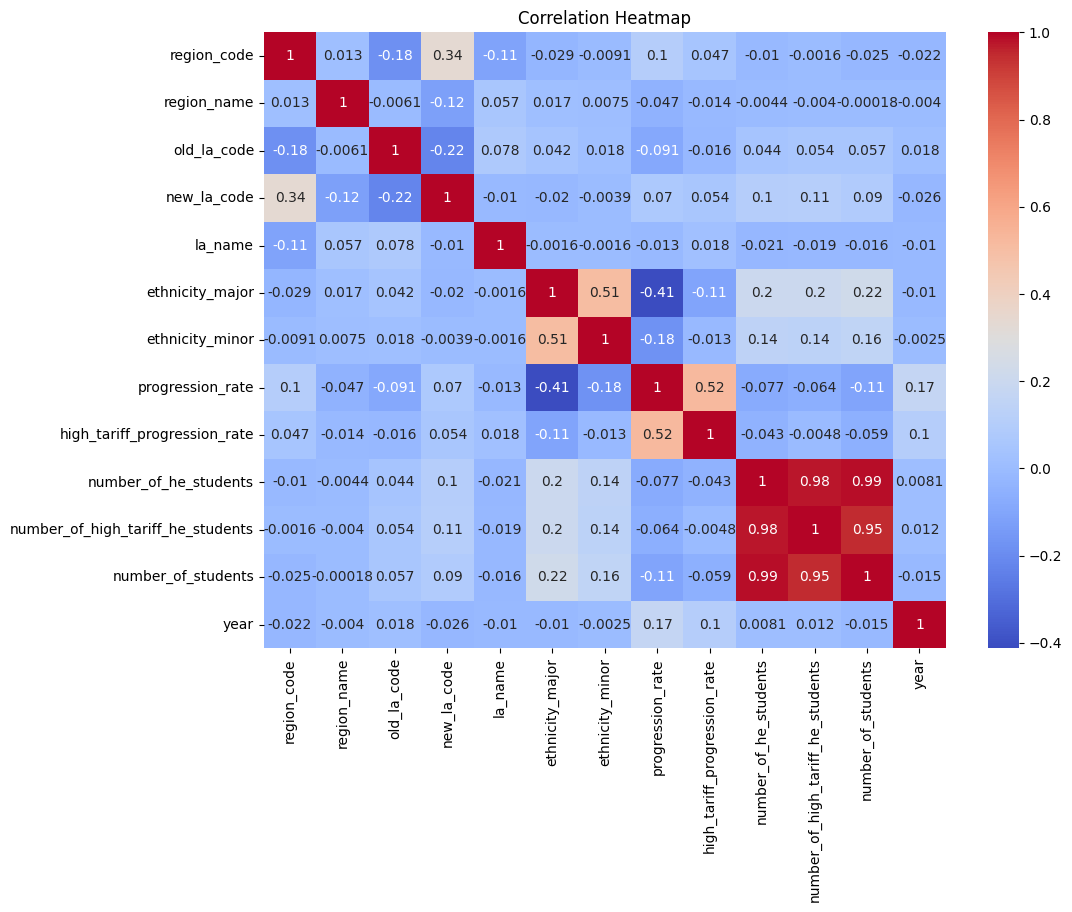

In [44]:
correlationM_det = finalethn_df.corr()
plt.figure(figsize=(11, 8))
sns.heatmap(correlationM_det, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
finalethn_df.drop('high_tariff_progression_rate', axis=1, inplace=True)
finalethn_df.drop('number_of_high_tariff_he_students', axis=1, inplace=True)


# Training the Model

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split



In [47]:

xdata = finalethn_df.drop(['progression_rate'], axis=1)  
ydata = finalethn_df['progression_rate']

# Standard Scalar

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
x_scdata = StandardScaler().fit_transform(xdata)

In [50]:
x_scdata

array([[-0.58781474, -1.84219505,  0.77858183, ..., -0.24431816,
        -0.23591962, -1.6404699 ],
       [-0.58781474, -1.84219505,  0.86840083, ..., -0.20035654,
        -0.21183688, -1.6404699 ],
       [-0.58781474, -1.84219505,  0.87199359, ...,  0.00296592,
        -0.06633698, -1.6404699 ],
       ...,
       [-0.9299693 ,  1.57239271,  0.7175049 , ..., -0.26080376,
        -0.23993341,  1.58834143],
       [-0.9299693 ,  1.57239271,  0.72469042, ..., -0.23058015,
        -0.2228748 ,  1.58834143],
       [-0.9299693 ,  1.57239271,  0.72828318, ..., -0.25805616,
        -0.23591962,  1.58834143]])

In [51]:
x_traindts,x_testdts,y_traindts,y_testdts = train_test_split(x_scdata,ydata,test_size = 0.2, random_state=0)

# 1. Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [53]:
from time import time
parlogi_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,200],
    'penalty': ['l1', 'l2']
}
logreg_gdcv = GridSearchCV(LogisticRegression(), param_grid=parlogi_reg,cv=7, n_jobs=-1)
logreg_gdcv.fit(x_traindts,y_traindts)
logi_bstparm = logreg_gdcv.best_params_
logi_bstscore = logreg_gdcv.best_score_
print("Best_parameters : ", logi_bstparm)
print("Best_score :",logi_bstscore)





/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Best_parameters :  {'C': 200, 'penalty': 'l2'}
Best_score : 0.8329985556443811


/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Model building

Complete time to build and evaluate :  3.2135729789733887
 Logistic_Regression accuracy details : 0.8921635434412266
 Logistic_Regression mean squared error details: 0.33985666885654775


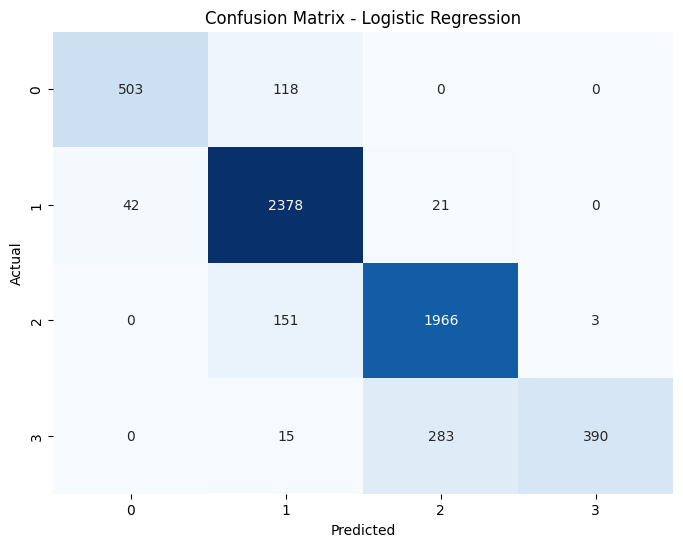


classification report: 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       621
           1       0.89      0.97      0.93      2441
           2       0.87      0.93      0.90      2120
           3       0.99      0.57      0.72       688

    accuracy                           0.89      5870
   macro avg       0.92      0.82      0.85      5870
weighted avg       0.90      0.89      0.89      5870



In [54]:
from time import time
import numpy as np

logistart_tm = time()

logireg_mdl = LogisticRegression(penalty= 'l2', C = 200,max_iter=900)
logireg_mdl.fit(x_traindts,y_traindts)
logi_ypred = logireg_mdl.predict(x_testdts)

logireg_score = logireg_mdl.score(x_testdts,y_testdts)

logiend_tm = time()

logireg_mse = np.sqrt(mean_squared_error(y_testdts,logi_ypred))

logireg_clsrpt = classification_report(y_testdts,logi_ypred)

#confusion matrix
logireg_cfnmtx = confusion_matrix(y_testdts,logi_ypred)

print("Complete time to build and evaluate : ", logiend_tm-logistart_tm)
print(" Logistic_Regression accuracy details :",logireg_score)
print(" Logistic_Regression mean squared error details:",logireg_mse)

plt.figure(figsize=(8, 6))
sns.heatmap(logireg_cfnmtx, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nclassification report: \n")

print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print(logireg_clsrpt)

# Decision Tree with Hyper Parameter Tuning

In [55]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [56]:
decparm = {
    'criterion': ['gini', "entropy"],
    'max_depth': [a for a in range(1, 65, 5)], 
    'min_samples_leaf': [b for b in range(1, 21, 1)]}
dectr_gd = GridSearchCV(DecisionTreeClassifier(), param_grid=decparm, cv=5) 
dectr_gd.fit(x_traindts, y_traindts)


print(" Best parameters : ",dectr_gd.best_params_)
print("Best score : ",dectr_gd.best_score_)

 Best parameters :  {'criterion': 'entropy', 'max_depth': 56, 'min_samples_leaf': 1}
Best score :  0.9206525572712281


Decision Tree Algorithm:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 time 0.08170604705810547

Score : 0.9366269165247019
 Confusion matrix :


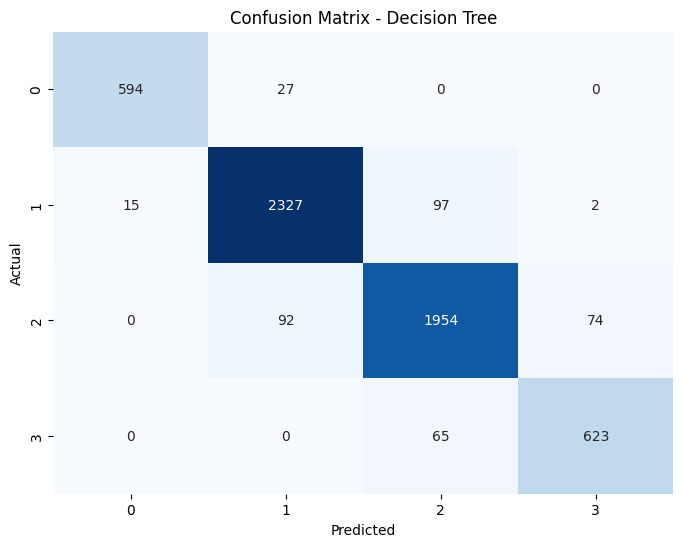


Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       621
           1       0.95      0.95      0.95      2441
           2       0.92      0.92      0.92      2120
           3       0.89      0.91      0.90       688

    accuracy                           0.94      5870
   macro avg       0.94      0.93      0.93      5870
weighted avg       0.94      0.94      0.94      5870



In [67]:
logistart_tm = time()
dectr_modl = DecisionTreeClassifier(criterion = 'entropy', max_depth = 50,min_samples_leaf = 1)
dectr_modl.fit(x_traindts,y_traindts)
logiend_tm = time()
dectr_ypred = dectr_modl.predict(x_testdts)
dectr_scr = dectr_modl.score(x_testdts,y_testdts)
dectr_confm = confusion_matrix(y_testdts,dectr_ypred)
dectr_clssrpt = classification_report(y_testdts,dectr_ypred)
print("Decision Tree Algorithm:")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print(" time",logiend_tm-logistart_tm)
print("\nScore :",dectr_scr)
print(" Confusion matrix :")
plt.figure(figsize=(8, 6))
sns.heatmap(dectr_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nClassification Report :")
print(dectr_clssrpt)


# Random Forest with Hyper Parameter Tuning

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
randfst_parm = {
    "criterion": ["gini", "entropy"], 
    "n_estimators": range(200, 900, 200)}
randfst_gdcv = GridSearchCV(RandomForestClassifier(), param_grid=randfst_parm, cv=5)
randfst_gdcv.fit(x_traindts, y_traindts)
print('Best Random Forest attributes:', randfst_gdcv.best_params_)
print('Best random forest Score:', randfst_gdcv.best_score_)

Best Random Forest attributes: {'criterion': 'entropy', 'n_estimators': 800}
Best random forest Score: 0.8736743209728715


Random forest Evaluation
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
time :  21.041818141937256
 score:  0.8853492333901193


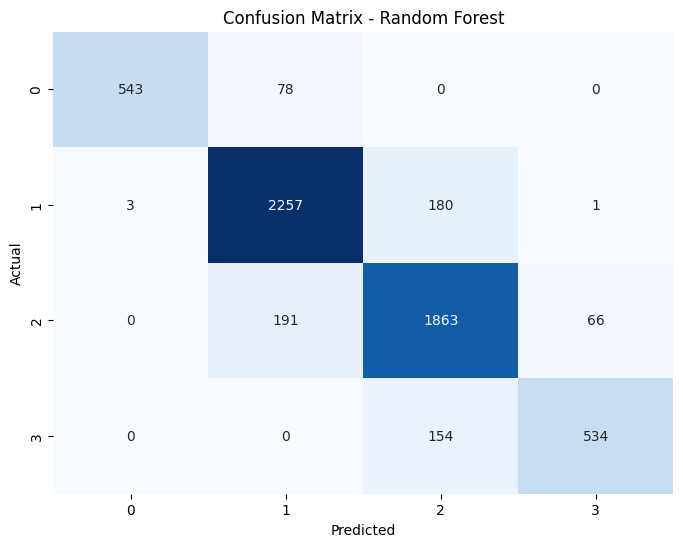


classification report :

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       621
           1       0.89      0.92      0.91      2441
           2       0.85      0.88      0.86      2120
           3       0.89      0.78      0.83       688

    accuracy                           0.89      5870
   macro avg       0.91      0.86      0.88      5870
weighted avg       0.89      0.89      0.89      5870



In [60]:
rndmfst_st = time()
rndmfst_mdl = RandomForestClassifier(criterion="entropy", max_depth= 20,n_estimators=1000)
rndmfst_mdl.fit(x_traindts, y_traindts)
rndmfst_ed = time()
rndmfst_ypred = rndmfst_mdl.predict(x_testdts)

rndmfst_scr = rndmfst_mdl.score(x_testdts,y_testdts)
rndmfst_confm = confusion_matrix(y_testdts,rndmfst_ypred)
rndmfst_clsrpt = classification_report(y_testdts,rndmfst_ypred)

print("Random forest Evaluation")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("time : ",rndmfst_ed-rndmfst_st)
print(" score: ",rndmfst_scr)

plt.figure(figsize=(8, 6))
sns.heatmap(rndmfst_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nclassification report :\n")
print(rndmfst_clsrpt)



# 4. Bagging Classifier with Decision Tree

Bagging classifier
 total time taken : 49.3181529045105
Accuracy score: 0.9592844974446337


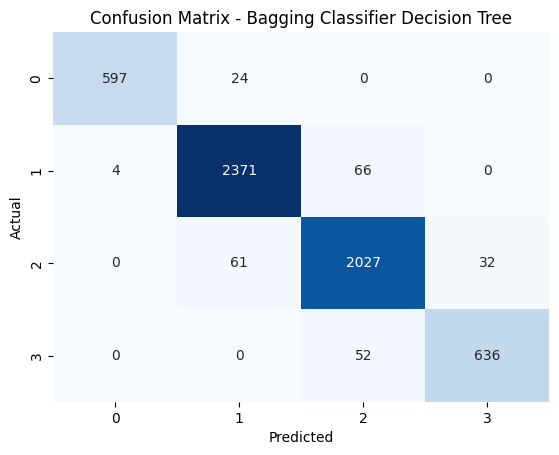

 Bagging classifier score : 0.9592844974446337
classification report :
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       621
           1       0.97      0.97      0.97      2441
           2       0.94      0.96      0.95      2120
           3       0.95      0.92      0.94       688

    accuracy                           0.96      5870
   macro avg       0.96      0.95      0.96      5870
weighted avg       0.96      0.96      0.96      5870



In [61]:
from sklearn.ensemble import BaggingClassifier

baggdt_str = time()
baggdt_clsmdl = BaggingClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 30,min_samples_leaf = 1), n_estimators=950, bootstrap=True)
baggdt_clsmdl.fit(x_traindts, y_traindts)

baggdt_ypred = baggdt_clsmdl.predict(x_testdts)

baggdt_scr = baggdt_clsmdl.score(x_testdts,y_testdts)

baggdt_confm = confusion_matrix(y_testdts,baggdt_ypred)
baggdt_clsrpt = classification_report(y_testdts,baggdt_ypred)
baggdt_ed = time()
print("Bagging classifier")
print("==============================")
print(" total time taken :",baggdt_ed-baggdt_str )
print("Accuracy score:",baggdt_scr)
sns.heatmap(baggdt_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Bagging Classifier Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(" Bagging classifier score :",baggdt_scr)
print("classification report :")
print(baggdt_clsrpt)

# 5. Gradient Boosting 

In [62]:
from sklearn.ensemble import GradientBoostingClassifier


Gradient Boosting Algorithm 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Time:  22.103185892105103
 
accuracy :  0.9870528109028961


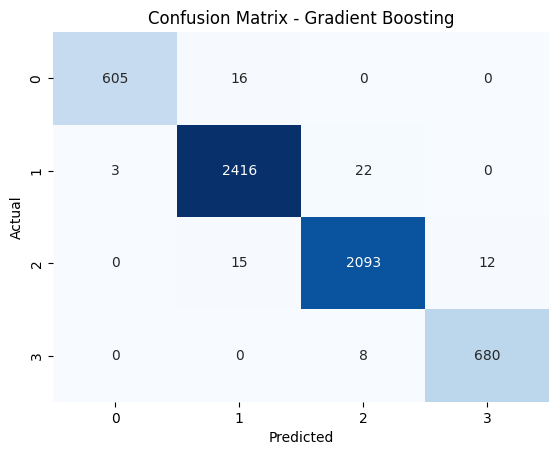

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       621
           1       0.99      0.99      0.99      2441
           2       0.99      0.99      0.99      2120
           3       0.98      0.99      0.99       688

    accuracy                           0.99      5870
   macro avg       0.99      0.98      0.99      5870
weighted avg       0.99      0.99      0.99      5870



In [63]:
gradi_stm = time()
gradibst_mdl = GradientBoostingClassifier(n_estimators=900,learning_rate=0.7,
                                          min_samples_leaf=4,
                                          max_depth=15)
gradibst_mdl.fit(x_traindts,y_traindts)

gradibst_ypred = gradibst_mdl.predict(x_testdts)

gradibst_score = gradibst_mdl.score(x_testdts,y_testdts)

gradibst_confm = confusion_matrix(y_testdts,gradibst_ypred)


gradibst_clsrpt = classification_report(y_testdts,gradibst_ypred)
gradi_edtm = time()
print("Gradient Boosting Algorithm ")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("\nTime: ",gradi_edtm-gradi_stm)
print(" \naccuracy : ",gradibst_score)

sns.heatmap(gradibst_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report : \n",gradibst_clsrpt)

# XGBClassifier

XGB Classifier Algorithm 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Time:  0.7378389835357666
 
accuracy :  0.98603066439523


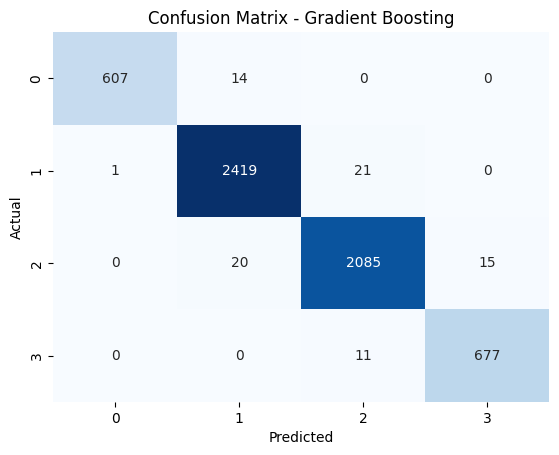

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       621
           1       0.99      0.99      0.99      2441
           2       0.98      0.98      0.98      2120
           3       0.98      0.98      0.98       688

    accuracy                           0.99      5870
   macro avg       0.99      0.98      0.99      5870
weighted avg       0.99      0.99      0.99      5870



In [64]:
from xgboost import XGBClassifier


xgbst_tm = time()
xgbclassif_mdl = XGBClassifier(n_estimators=200, learning_rate=0.5)
xgbclassif_mdl.fit(x_traindts, y_traindts)

xgby_pred = xgbclassif_mdl.predict(x_testdts)

xgbclassif_score = xgbclassif_mdl.score(x_testdts, y_testdts)

confm_xgb = confusion_matrix(y_testdts, xgby_pred)

clsrptxgb = classification_report(y_testdts, xgby_pred)

xgbed_tm = time()

print("XGB Classifier Algorithm ")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("\nTime: ",xgbed_tm-xgbst_tm)
print(" \naccuracy : ",xgbclassif_score)

sns.heatmap(confm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report : \n",clsrptxgb)

In [65]:
cls_rpt_xgb

NameError: name 'cls_rpt_xgb' is not defined

In [ ]:
pip install xgboost
